In [9]:
import fminbnd
import fminsearch
from functions import *
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt', 'sin', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
counter = [-1]
def f(x, c=counter):
    c[0] += 1
    return f3(x)

y = fminsearch.simplex(f, [10])
print(y, f(y))

[ 0.] 1.0


In [3]:
counter = [-1]
def f(x, c=counter):
    c[0] += 1
    return f3(x)

y = fminbnd.search(f, 10)
print(y, f(y))

1.000000141026334 1.988842686570806e-14


golden ratio            coord search            simplex                 hj                     
  43 [1.000000]          83 [1.000000]          14 [0.000000]         132 [1.000000]
  53 [1.000000]          93 [1.000000]          35 [0.000000]         227 [1.000000]
  56 [1.000000]          95 [1.000000]          41 [0.000000]         280 [1.000000]
  56 [1.000000]          95 [1.000000]          41 [0.000000]         293 [1.000000]
  58 [1.000000]          97 [1.000000]          47 [0.000000]         293 [1.000000]
  58 [1.000000]          97 [1.000000]          47 [0.000000]         359 [1.000000]
  58 [1.000000]          97 [1.000000]          47 [0.000000]         354 [1.000000]
  58 [1.000000]          97 [1.000000]          50 [0.000000]         391 [1.000000]
  60 [1.000000]         100 [1.000000]          53 [0.000000]         418 [1.000000]


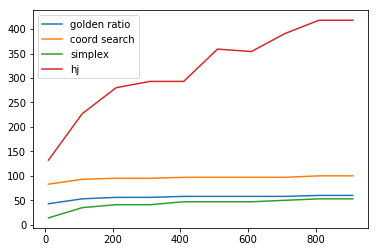

In [27]:
counter = [-1]
def f(x, c=counter):
    c[0] += 1
    return f3(x)

alg1 = list()
alg2 = list()
alg3 = list()
alg4 = list()

for i in range(10,1000, 100):
    
    x = [i]
    
    counter[0] = -1
    f(0, counter)
    y = fminbnd.search(f, i)
    alg1.append((y, counter[0]))
    
    counter[0] = -1
    f(0, counter)
    y = fminsearch.coordinateSearch(f, x)
    alg2.append((y, counter[0]))
    
    counter[0] = -1
    f(0, counter)
    y = fminsearch.simplex(f, x)
    alg3.append((y, counter[0]))
    
    counter[0] = -1
    f(0, counter)
    y = fminsearch.hj(f, x)
    alg4.append((y, counter[0]))
    
print("{0:<23s} {1:<23s} {2:<23s} {3:<23s}".format("golden ratio", "coord search", "simplex", "hj"))



for i in range(9): 
    print("%4d [%f]        %4d [%f]        %4d [%f]        %4d [%f]" % (
        alg1[i][1], alg1[i][0],alg2[i][1], alg2[i][0],
        alg3[i][1], alg3[i][0],alg4[i][1], alg4[i][0]))

plt.plot(range(10,1000, 100), [j for _, j in alg1], label="golden ratio")
plt.plot(range(10,1000, 100), [j for _, j in alg2], label="coord search")
plt.plot(range(10,1000, 100), [j for _, j in alg3], label="simplex")
plt.plot(range(10,1000, 100), [j for _, j in alg4], label="hj")
plt.legend();
    

In [32]:

alg2 = list()
alg3 = list()
alg4 = list()

data = np.array

fs = [f1, f2, f3, f4]
points = [[-1.9, 2], [0.1, 0.3], [0, 0, 0, 0, 0], [5.1, 1.1]]
xmins = [[1, 1], [4, 2], [1, 2, 3, 4, 5], [0, 0]]

for i in range(4):

    counter = [-1]
    def f(x, c=counter):
        c[0] += 1
        return fs[i](x)

    counter[0] = -1
    f(points[i], counter)
    y = fminsearch.coordinateSearch(f, points[i])
    alg2.append((y, counter[0]))

    counter[0] = -1
    f(points[i], counter)
    y = fminsearch.simplex(f, points[i])
    alg3.append((y, counter[0]))

    counter[0] = -1
    f(points[i], counter)
    y = fminsearch.hj(f, points[i])
    alg4.append((y, counter[0]))
    

    
for i in range(4):
    print('f'+str(i+1), "start_point", points[i],'solution', xmins[i])
    print(alg2[i][1], alg2[i][0], 'coord search')
    print(alg3[i][1], alg3[i][0], 'simplex')
    print(alg4[i][1], alg4[i][0], 'hj')
    print()

f1 start_point [-1.9, 2] solution [1, 1]
240555 [ 1.00030636  1.000613  ] coord search
220 [ 1.00073193  1.00136687] simplex
694 [ 1.00000153  1.00000381] hj

f2 start_point [0.1, 0.3] solution [4, 2]
157 [ 3.99999979  2.00000011] coord search
94 [ 3.99974222  1.99979192] simplex
305 [ 3.99999962  2.00000076] hj

f3 start_point [0, 0, 0, 0, 0] solution [1, 2, 3, 4, 5]
393 [ 0.99999995  1.99999991  3.00000024  3.99999997  5.        ] coord search
277 [ 1.00112705  2.00032232  3.00036869  4.00133969  4.99935892] simplex
427 [ 1.  2.  3.  4.  5.] hj

f4 start_point [5.1, 1.1] solution [0, 0]
154 [-1.09999965  1.09999951] coord search
190 [  4.14912222e-08  -1.41202741e-06] simplex
172 [ 3.1  3.1] hj



In [7]:
counter = [-1]
def f(x, c=counter):
    c[0] += 1
    return f4(x)

counter[0] = -1
f(points[i], counter)
y = fminsearch.hj(f, (5,5))
print(y, counter[0])

counter[0] = -1
f(points[i], counter)
y = fminsearch.simplex(f, (5,5))
print(y, counter[0])

[ 5.  5.] 152
[ -1.79474181e-08  -1.38744817e-06] 197


shift: 1	94 [ 0.9994787   0.99894157]	610 [ 0.99970175  0.99941502]
shift: 2	242 [ 0.99973039  0.99952886]	537 [ 1.00112242  1.00218966]
shift: 3	152 [ 0.99960984  0.99912811]	453 [ 0.99980652  0.99955928]
shift: 4	148 [ 1.00016212  1.00028865]	508 [ 0.99926661  0.99860076]
shift: 5	150 [ 0.99929613  0.99858725]	416 [ 1.00020555  1.00048782]
shift: 6	292 [ 0.99931072  0.99862715]	452 [ 1.00063567  1.0011855 ]
shift: 7	136 [ 1.00046309  1.00086351]	366 [ 0.99967548  0.99942588]
shift: 8	186 [ 1.00049443  1.00095679]	361 [ 0.99986496  0.99981544]
shift: 9	149 [ 1.00076178  1.00152497]	533 [ 1.00024763  1.00049313]
shift: 10	135 [ 1.00028962  1.00049105]	483 [ 0.99949987  0.99892324]
shift: 11	148 [ 1.00025203  1.00047015]	309 [ 0.99974053  0.99942803]
shift: 12	151 [ 0.99971831  0.9994999 ]	451 [ 1.00095116  1.00187186]
shift: 13	315 [ 1.00070549  1.00133069]	493 [ 0.99995545  0.99997553]
shift: 14	145 [ 0.99965268  0.99926794]	437 [ 1.00048869  1.00090299]
shift: 15	138 [ 1.00029674  1.

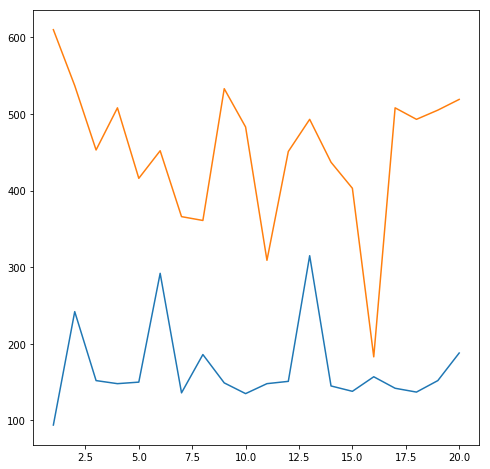

In [30]:
counter = [-1]
def f(x, c=counter):
    c[0] += 1
    return f1(x)

list1 = list()
list2 = list()

for i in range(1, 21):
    
    print("shift:", i, end="\t")
    
    counter[0] = -1
    y = fminsearch.simplex(f, x0=(0.5, 0.5), shift = i)
    
    print(counter[0], y, end="\t")
    list1.append(counter[0])
    
    
    counter[0] = -1
    y = fminsearch.simplex(f, x0=(20, 20), shift = i)
    
    print(counter[0], y)
    list2.append(counter[0])

plt.figure(figsize=(8, 8))

plt.plot(range(1, 21), list1)
plt.plot(range(1, 21), list2)

In [6]:
from random import randint

In [31]:

counter = 0
for i in range(100):
    while(True):
        counter+=1
        point = (randint(-50, 50), randint(-50, 50))
        y = fminsearch.simplex(f6, x0=point)
        if f6(y) < 1e-4:
            break
        
print((100/counter)*100, '%')


0.03698730965405769 %
